# The Sparks Foundation
## Graduate Rotational Internship Program (GRIP)
### Data Science &Business Analytics Internship
### Auther : Shraddha Tarawade
## Task 6 - Prediction using Decision Tree algorithm
### Problem statement: Create the Decision Tree classifier and visualize it graphically.
    Data set :  https://bit.ly/3kXTdox

### 1.  Importing the required libraries and Data

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as feature_name_in_
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report

#Importing necessary libraries for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets

In [154]:
data = pd.read_csv(r"C:\Users\shrad\Desktop\Data Science\SparkFoundation\Task2\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Getting the information of the data

In [155]:
# data.info() gives Consize memmory of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [156]:
# data.tail(n) gives last n rows from the data
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [157]:
# data.isnull().sum() gives count of missing values present in each column
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [158]:
# data.describe() gives statistical properties of the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [159]:
# data.shape gives number of rows and columns in the data
data.shape

(150, 6)

In [160]:
#Checking the correlation between features in the dataset
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### From this correlation table, we can make the following inferences
    The sepal length has a very high correlation with petal length and petal width
    In the same vein, petal length is highly correlated with petal width

### 3. Check for Outliers by box plot,Remove outliers with IQR method because clusters are sensitive to outliers

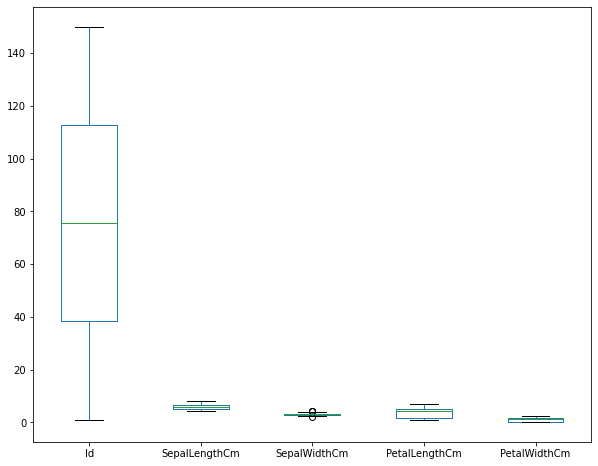

In [161]:
plt.rcParams["figure.figsize"] = (10,8)
data.plot(kind='box')
plt.show()

In [162]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3-Q1

data = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]

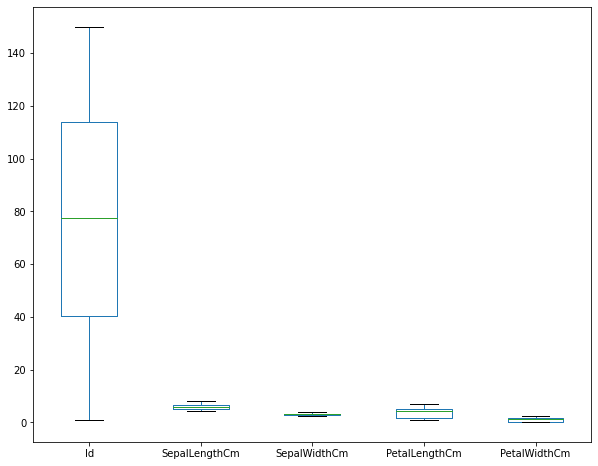

In [163]:
plt.rcParams["figure.figsize"] = (10,8)
data.plot(kind='box')
plt.show()

#### Now,Dataset has no outliers.

### 4. Data Visualization comparing various features

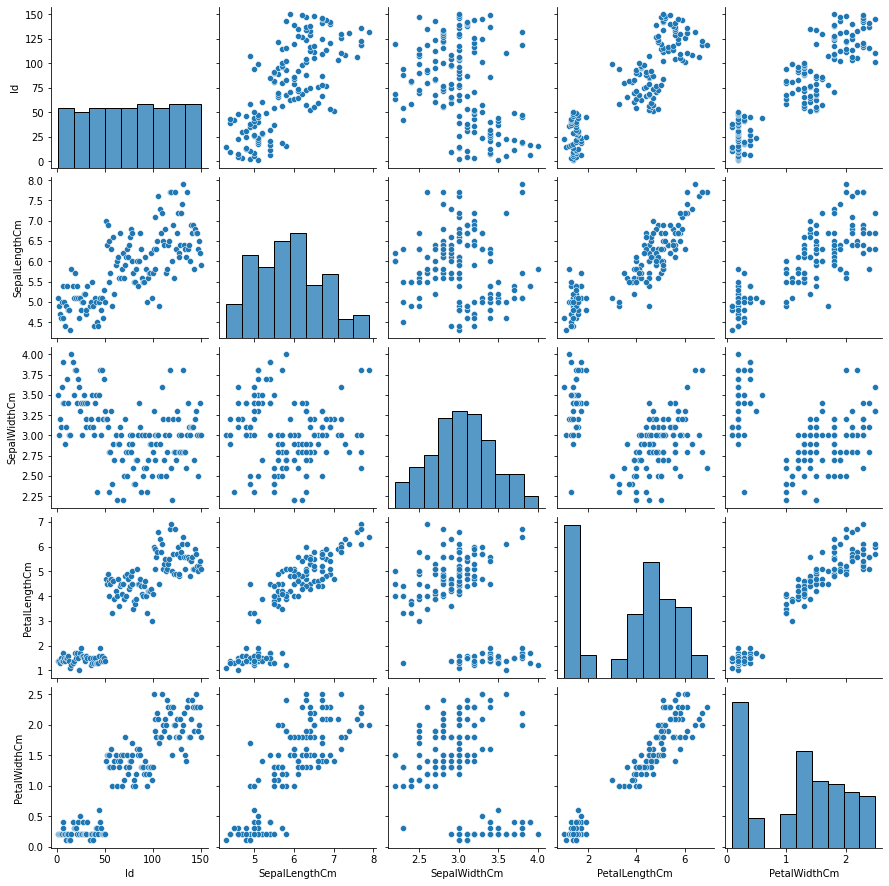

In [164]:
# Input data Visualization
sns.pairplot(data)

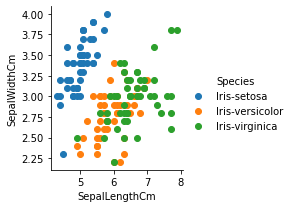

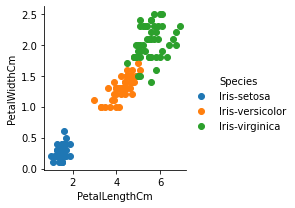

In [165]:
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

In [166]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 5. Decision Tree Model Training

In [167]:
# let's remove categorical column which is unnecessary for making clusters
x = data.drop('Species',axis=1)

In [168]:
# Categories of flowers
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

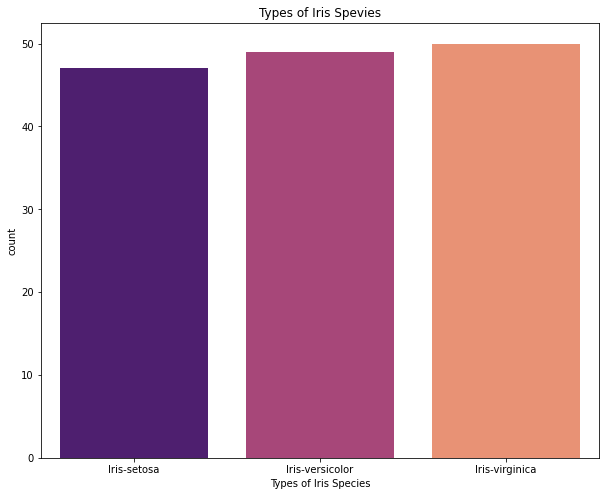

In [169]:
# value count of every class through countplot 
sns.countplot(data['Species'],palette='magma')
plt.xlabel('Types of Iris Species')
plt.title('Types of Iris Spevies')
plt.show()

In [170]:
# Labeling flower species
y = data['Species'].replace(('Iris-setosa','Iris-versicolor','Iris-virginica'),(0,1,2))

In [171]:
# check whether target variable is labeled or not.
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 146, dtype: int64

In [172]:
# splitting dataset into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =1)
# Let's build classification model
dt = DecisionTreeClassifier()
dt_model = dt.fit(x_train,y_train)
print("Decision tree model is created...")

Decision tree model is created...


In [173]:
# Predict y
y_pred = dt_model.predict(x_test)

In [174]:
from sklearn.datasets import load_iris
import sklearn.feature_extraction.text as feature_names_in_

### 6. Visualizing the Trained Model

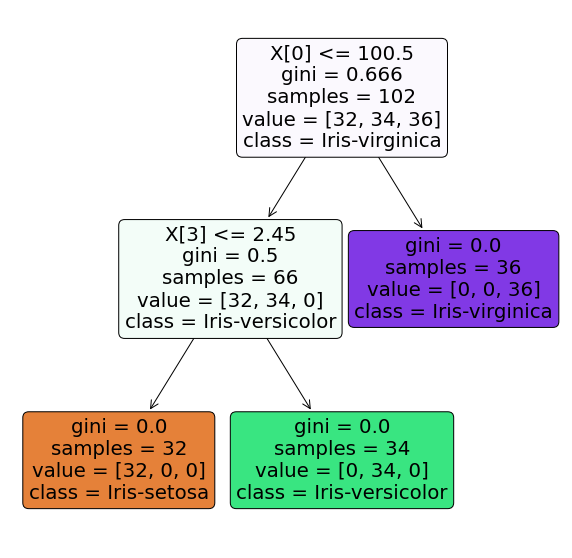

In [175]:
# visualizing Decision Tree
plt.figure(figsize=(10,10))
tree.plot_tree(dt_model)
tree.plot_tree(dt, 
               class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
               rounded=True, 
               filled = True);

In [176]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 14]], dtype=int64)

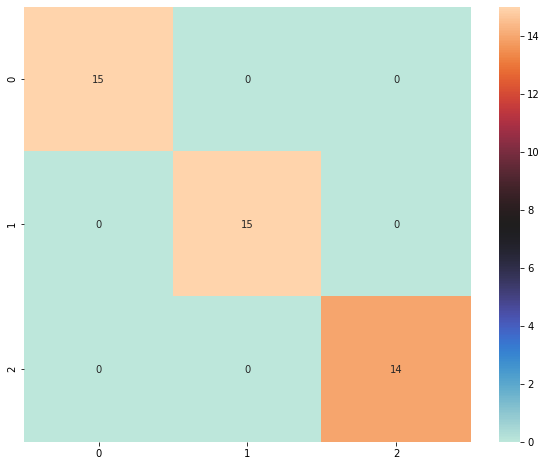

In [177]:
# Visualizing the confusion matrix with the help of heatmap
sns.heatmap(cm,annot=True,cmap='icefire')
plt.show()

In [178]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        14

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



Predicting the class output for some random values of petal and sepal length and width
### 7. Calculating the Model Accuracy

In [179]:
from sklearn.metrics import accuracy_score
# Model Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


## Conclusion: I was successfully able to carry-out the prediction using Decision Tree Algorithm and evaluate the model's accuracy.